In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

Для простого линейного примера мы просто создадим несколько фиктивных данных, которые будут использоваться вместо импорта набора данных.

In [2]:
# linear data
X = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])

Причина, по которой мы работаем с массивами numpy, заключается в том, чтобы ускорить матричные операции, поскольку они используют меньше памяти, чем списки Python. Теперь давайте посмотрим, как выглядят данные на графике:

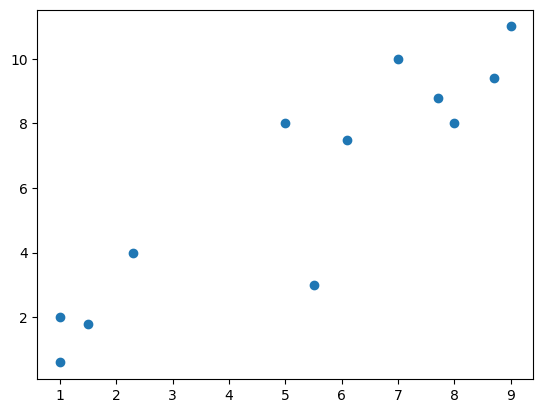

In [3]:
# показывать неклассифицированные данные
plt.scatter(X, y)
plt.show()

Мы проведем небольшую предварительную обработку уже структурированного кода. Это переведет исходные данные в формат, который мы сможем использовать для обучения SVM-модели.

In [4]:
# формирование данных для обучения модели
training_X = np.vstack((X, y)).T
training_y = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

In [5]:
# определите модель
clf = svm.SVC(kernel='linear', C=1.0)

In [6]:
clf.fit(training_X, training_y)

SVC(kernel='linear')

Вот как вы можете построить модель для любого проекта машинного обучения. Имеющийся у нас набор данных может быть небольшим, но если вы столкнетесь с реальным набором данных, который можно классифицировать с помощью линейной границы, эта модель все равно будет работать.

Обучив свою модель, вы можете делать прогнозы относительно того, как будет классифицироваться новая точка данных, и вы можете построить график границы принятия решения. Давайте построим границу принятия решения.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


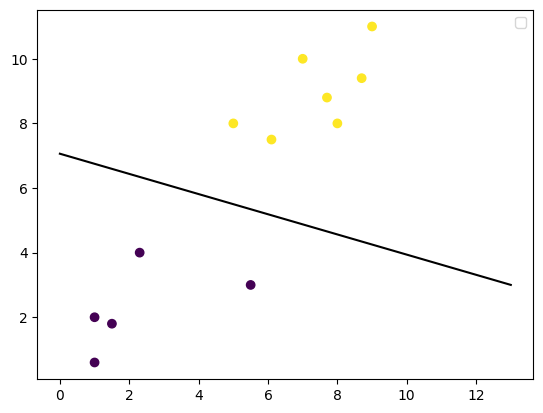

In [7]:
# получите весовые значения для линейного уравнения из обученной SVM-модели
w = clf.coef_[0]

# получите смещение по оси y для линейного уравнения
a = -w[0] / w[1]

# выделите пространство по оси x для точек данных
XX = np.linspace(0, 13)

# получите значения y для построения границы решения
yy = a * XX - clf.intercept_[0] / w[1]

# нанесите на график границу принятия решения
plt.plot(XX, yy, 'k-')

plt.scatter(training_X[:, 0], training_X[:, 1], c=training_y)
plt.legend()
plt.show()

In [8]:
# non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)

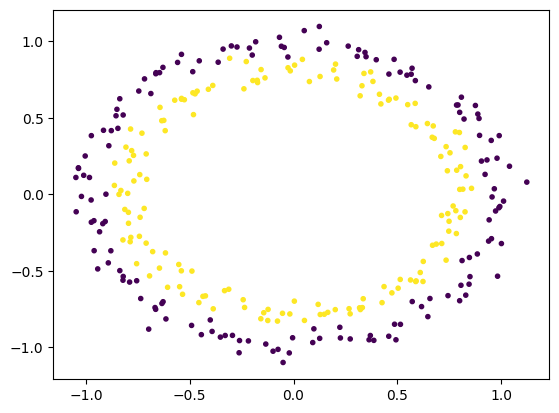

In [9]:
# show raw non-linear data
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()

In [10]:
# make non-linear algorithm for model
nonlinear_clf = svm.SVC(kernel='rbf', C=1.0)

In [11]:
# training non-linear model
nonlinear_clf.fit(circle_X, circle_y)

SVC()

In [12]:
# построение границу решения для нелинейной задачи SVM
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # граница решения 
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])

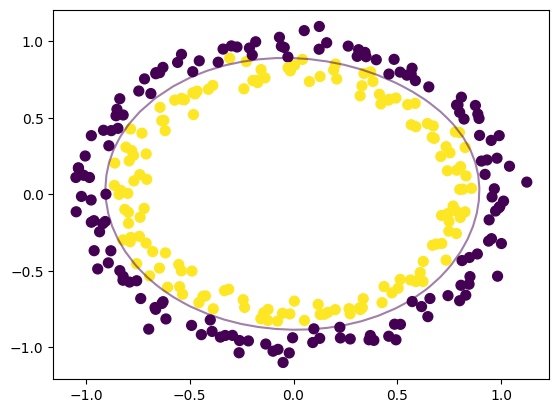

In [13]:
# построение данных и границы принятия решения
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, s=50)
plot_decision_boundary(nonlinear_clf)
plt.scatter(nonlinear_clf.support_vectors_[:, 0], nonlinear_clf.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.show()